In [1]:
%pylab inline
import numpy as np
import advent

import itertools
from collections import Counter, defaultdict

Populating the interactive namespace from numpy and matplotlib


In [2]:
read_lines = lambda day, test=False: advent.read_lines(2021, day, test)

def debug(*args, **kwargs):
    if DEBUG:
        print(*args)

In [3]:
def day1(lines):
    vals = advent.lines_as_ints(lines)
    part1 = sum(np.diff(vals) > 0)
    
    windowed = np.convolve(vals, np.ones(3), mode='valid')
    part2 = sum(diff(windowed) > 0)
    return (part1, part2)

In [4]:
def day2(lines):
    pairs = [line.split() for line in lines]
    pairs = [(d, int(v)) for (d,v) in pairs]
    
    x = 0; z = 0
    for (d, v) in pairs:
        if d == 'forward':
            x = x + v
        elif d == 'down':
            z = z + v
        elif d == 'up':
            z = z - v
    p1 = x * z
    debug(x, z, x * z)
            
    x = 0; z = 0; aim = 0
    for (d, v) in pairs:
        if d == 'forward':
            x = x + v
            z = z + aim * v
        elif d == 'down':
            aim = aim + v
        elif d == 'up':
            aim = aim - v
    p2 = x * z
    debug(x, z, x * z)
    
    return (p1, p2)

In [5]:
def day3(lines):
    vals = np.array(list(map(lambda line: [int(x) for x in line], lines)), dtype=np.bool)
    means = (np.mean(vals, axis=0) > 0.5)
    p1 = advent.bool_to_int(means) * advent.bool_to_int(~means)

    vals2 = vals
    for ii in range(0, vals2.shape[1]):
        crit = (np.mean(vals2[:,ii]) >= 0.5)
        vals2 = vals2[vals2[:,ii] == crit,:]
        if vals2.shape[0] == 1:
            break
    o2 = advent.bool_to_int(vals2[0])

    vals2 = vals
    for ii in range(0, vals2.shape[1]):
        crit = (np.mean(vals2[:,ii]) < 0.5)
        vals2 = vals2[vals2[:,ii] == crit,:]
        if vals2.shape[0] == 1:
            break
    co2 = advent.bool_to_int(vals2[0])
    p2 = o2 * co2

    return (p1, p2)

In [6]:
def day4(lines):
    draw = advent.line_as_ints(lines[0])
    grids = lines[2:]
    all_grids = []
    cur_grid = []
    for line in grids:
        if line != '':
            vals = line.strip().split(' ')
            vals = [int(x) for x in vals if x != '']
            cur_grid.append(vals)
        else:
            all_grids.append(cur_grid)
            cur_grid = []
    all_grids.append(cur_grid)
    grids = np.array(all_grids)
    
    g = grids.copy()

    found = False
    board = None
    row = None
    col = None

    for ii in range(0, len(draw)):
        g[g == draw[ii]] = -1

        if np.any(np.all(g == -1, axis=1)):
            found = True
            board = np.where(np.all(g == -1, axis=1))[0][0]
            col = np.where(np.all(g == -1, axis=1))[0][0]
            break

        if np.any(np.all(g == -1, axis=2)):
            found = True
            board = np.where(np.all(g == -1, axis=2))[0][0]
            row = np.where(np.all(g == -1, axis=2))[1][0]
            break
    board_sum = np.sum(g[board, g[board] != -1])
    p1 = board_sum * draw[ii]
    
    g = grids.copy()

    solved_order = []
    solved = set()

    for ii in range(0, len(draw)):
        g[g == draw[ii]] = -1

        if np.any(np.all(g == -1, axis=1)):
            boards = np.where(np.all(g == -1, axis=1))[0]
            for b in boards:
                if b not in solved:
                    solved_order.append(b)
                    solved.add(b)

        if np.any(np.all(g == -1, axis=2)):
            boards = np.where(np.all(g == -1, axis=2))[0]
            for b in boards:
                if b not in solved:
                    solved_order.append(b)
                    solved.add(b)

        if len(solved) == g.shape[0]:
            break
    p2 = np.sum(g[solved_order[-1], g[solved_order[-1]] != -1]) * draw[ii]
    return (p1, p2)

In [7]:
def day5(lines):
    def parse_points(line):
        start, end = line.split('->')
        start = start.split(',')
        end = end.split(',')
        start = list(map(int, start))
        end = list(map(int, end))
        return (start, end)

    parsed = []
    for line in lines:
        parsed.append(parse_points(line))
    
    c = Counter()
    for (start, end) in parsed:
        if start[0] == end[0] or start[1] == end[1]:
            c.update([pt for pt in advent.line_iter(start, end)])
    p1 = np.count_nonzero(np.array(list(c.values())) > 1)    
    
    c = Counter()
    for (start, end) in parsed:
        c.update([pt for pt in advent.line_iter(start, end)])
    p2 = np.count_nonzero(np.array(list(c.values())) > 1)    
    
    return (p1, p2)

In [8]:
def day6(lines):
    fish = advent.line_as_ints(lines[0])
    counts = np.zeros((9,), dtype=np.int64)
    for f in fish:
        counts[f] = counts[f] + 1

    for day in range(0, 80):
        zeros = counts[0]
        counts[0:8] = counts[1:9]
        counts[6] = counts[6] + zeros
        counts[-1] = zeros
    p1 = np.sum(counts)

    fish = advent.line_as_ints(lines[0])
    counts = np.zeros((9,), dtype=np.int64)
    for f in fish:
        counts[f] = counts[f] + 1

    for day in range(0, 256):
        zeros = counts[0]
        counts[0:8] = counts[1:9]
        counts[6] = counts[6] + zeros
        counts[-1] = zeros
    p2 = np.sum(counts)
    return (p1, p2)

In [9]:
def day7(lines):
    pos = advent.line_as_ints(lines[0])
    minpos = np.median(pos)
    p1 = np.sum(np.abs(pos - minpos))

    avg = np.mean(pos)
    (pos1, pos2) = (np.floor(avg), np.ceil(avg))
    (cost1, cost2) = (0, 0)
    
    for ii in pos:
        diff1 = np.abs(pos1 - ii)
        diff2 = np.abs(pos2 - ii)

        cc1 = (diff1 * (diff1 + 1)) // 2
        cc2 = (diff2 * (diff2 + 1)) // 2

        cost1 = cost1 + cc1
        cost2 = cost2 + cc2

    p2 = min(cost1, cost2)
    return int(p1), int(p2)

In [10]:
def day8(lines):

    def parse(line):
        patterns, output = line.split('|')
        patterns = patterns.strip().split(' ')
        patterns = [set(p) for p in patterns]
        output = output.strip().split(' ')
        output = [set(o) for o in output]
        return patterns, output

    matching = 0 
    for line in lines:
        patterns, output = parse(line)
        for val in output:
            if len(val) in (2, 3, 4, 7):
                matching = matching + 1
    p1 = matching

    digits = {
        0: 'abcefg',
        1: 'cf',
        2: 'acdeg',
        3: 'acdfg',
        4: 'bcdf',
        5: 'abdfg',
        6: 'abdefg',
        7: 'acf',
        8: 'abcdefg',
        9: 'abcdfg'
    }
    sdigits = [set(v) for v in digits.values()]
    rdigits = {v:k for (k,v) in digits.items()}

    outputs = []
    for line in lines:
        for ii, perm in enumerate(itertools.permutations('abcdefg')):
            trans = str.maketrans('abcdefg', ''.join(perm))
            tline = line.translate(trans)
            patterns, output = parse(tline)
            valid = [pattern in sdigits for pattern in patterns]
            if np.all(valid):
                break
        outs = [''.join(sorted(o)) for o in output]
        outputs.append(int(''.join([str(rdigits[o]) for o in outs])))
    p2 = np.sum(outputs)
    
    return (p1, p2)

In [11]:
def day9(lines):
    grid = np.array([[int(x) for x in line] for line in lines])

    grid2 = np.ones((grid.shape[0] + 2, grid.shape[1] + 2), dtype=int) * 9
    grid2[1:-1,1:-1] = grid
    left = grid < grid2[1:-1,0:-2]
    right = grid < grid2[1:-1,2:]
    up = grid < grid2[0:-2,1:-1]
    down = grid < grid2[2:,1:-1]
    minima = np.bitwise_and(np.bitwise_and(left, right), np.bitwise_and(up, down))
    p1 = sum(grid[minima] + 1)

    xx, yy = np.where(minima)
    basins = []
    for seed in zip(xx,yy):
        basin = np.zeros(grid2.shape, dtype=bool)
        basin[seed[0] + 1, seed[1] + 1] = True
        cx, cy = np.where(basin)
        expanding = True
        while expanding:
            cx, cy = np.where(basin)
            for pt in zip(cx, cy):
                check = [
                    (pt[0], pt[1] + 1),
                    (pt[0], pt[1] - 1),
                    (pt[0] + 1, pt[1]),
                    (pt[0] - 1, pt[1]),
                ]
                for c in check:
                    if grid2[c] != 9 and grid2[c] > grid2[pt]:
                        basin[c] = True

            nx, ny = np.where(basin)

            if len(nx) == len(cx):
                expanding = False
        basins.append(basin)

    basins = sorted(basins, key = lambda b: np.sum(b), reverse=True)
    p2 = np.sum(basins[0]) * np.sum(basins[1]) * np.sum(basins[2])
    
    if False:
        all_basins = np.zeros(grid2.shape)
        basins = sorted(basins, key = lambda b: np.sum(b), reverse=False)
        for ii, basin in enumerate(basins):
            all_basins[basin] = ii + 1
        plt.figure(figsize=(10,10))
        plt.imshow(all_basins, cmap='plasma')
    return (p1, p2)

In [12]:
def day11(lines):
    grid = np.zeros((12,12), dtype=int)
    mask = np.zeros((12,12), dtype = bool)
    mask[1:-1,1:-1] = True
    grid[1:-1,1:-1] = np.array([[int(x) for x in line] for line in lines])

    flashes = 0
    for ii in range(0,100):
        grid_n = grid.copy()
        grid_n[mask] += 1
        flashed = np.zeros((12,12), dtype=bool)
        done = False

        while not done:
            to_flash = (grid_n > 9)
            xx,yy = np.where(np.bitwise_and(to_flash, np.bitwise_not(flashed)))
            if len(xx) == 0:
                done = True
            else:
                flashed = np.bitwise_or(flashed, to_flash)
                grid_n[xx+1,yy+1] += 1
                grid_n[xx+1,yy] += 1
                grid_n[xx+1,yy-1] += 1
                grid_n[xx-1,yy+1] += 1
                grid_n[xx-1,yy] += 1
                grid_n[xx-1,yy-1] += 1
                grid_n[xx,yy+1] += 1
                grid_n[xx,yy-1] += 1
                grid_n[np.bitwise_not(mask)] = 0
        grid_n[flashed] = 0
        flashes += np.sum(flashed)

        if np.sum(flashed) == 100:
            print(ii + 1)
        grid = grid_n
    p1 = flashes

    grid = np.zeros((12,12), dtype=int)
    mask = np.zeros((12,12), dtype = bool)
    mask[1:-1,1:-1] = True
    grid[1:-1,1:-1] = np.array([[int(x) for x in line] for line in lines])

    flashes = 0
    for ii in range(0,500):
        grid_n = grid.copy()
        grid_n[mask] += 1
        flashed = np.zeros((12,12), dtype=bool)
        done = False

        while not done:
            to_flash = (grid_n > 9)
            xx,yy = np.where(np.bitwise_and(to_flash, np.bitwise_not(flashed)))
            if len(xx) == 0:
                done = True
            else:
                flashed = np.bitwise_or(flashed, to_flash)
                grid_n[xx+1,yy+1] += 1
                grid_n[xx+1,yy] += 1
                grid_n[xx+1,yy-1] += 1
                grid_n[xx-1,yy+1] += 1
                grid_n[xx-1,yy] += 1
                grid_n[xx-1,yy-1] += 1
                grid_n[xx,yy+1] += 1
                grid_n[xx,yy-1] += 1
                grid_n[np.bitwise_not(mask)] = 0
        grid_n[flashed] = 0
        flashes += np.sum(flashed)

        if np.sum(flashed) == 100:
            p2 = ii + 1
            break
        grid = grid_n
    return (p1, p2)

In [13]:
def day13(lines):
    def foldy(grid, y):
        return grid[:,:y] + np.flip(grid[:,(y+1):], axis=1)

    def foldx(grid, x):
        return grid[:x,:] + np.flip(grid[(x+1):, :], axis=0)

    def fold(grid, direction, val):
        return foldx(grid, val) if direction == 'x' else foldy(grid, val)

    coords = []
    for ii, line in enumerate(lines):
        if line == '':
            break
        coords.append(advent.line_as_ints(line))

    folds = []

    for jj in range(ii+1, len(lines)):
        ins = lines[jj].split()[-1]
        dd, vv = ins.split('=')
        folds.append((dd, int(vv)))

    coords = np.array(coords)

    xmin = np.min(coords[:,0])
    xmax = np.max(coords[:,0])

    ymin = np.min(coords[:,1])
    ymax = np.max(coords[:,1])

    grid = np.zeros((xmax+1,ymax+1), dtype=bool)
    grid[coords[:,0], coords[:,1]] = True

    p1 = np.sum(fold(grid, folds[0][0], folds[0][1]))

    grid2 = grid.copy()
    for dd, vv in folds:
        grid2 = fold(grid2, dd, vv)
    plt.imshow(grid2.T > 0)
    p2 = "PZFJHRFZ"
    
    return (p1, p2)

In [88]:
lines = read_lines(14)

def day14(lines):
    template = lines[0]
    ins = {line.split()[0]: line.split()[2] for line in lines[2:]}

    start = template
    for jj in range(0, 10):
        out = start[0]
        for ii in range(1, len(start)):
            val = start[ii-1:ii+1]
            if val in ins:
                out += ins[val]
            out += start[ii]
        start = out

    c = Counter(out)
    c = sorted(c.items(), key=lambda x: x[1], reverse=True)
    p1 = c[0][1] - c[-1][1]
    
    start = template
    c = Counter()
    c2 = Counter()
    for ii in range(len(start)):
        c[start[ii]] += 1
        if ii+1 < len(start):
            c2[start[ii:ii+2]] += 1

    for ii in range(0, 40):        
        c2_n = Counter()
        for pair, count in c2.items():
            if pair in ins:
                c2_n[pair[0] + ins[pair]] += count
                c2_n[ins[pair] + pair[1]] += count
                c[ins[pair]] += count
            c2 = c2_n

    c = sorted(c.items(), key=lambda x: x[1], reverse=True)
    p2 = c[0][1] - c[-1][1]
    return (p1, p2)

day1
part 1:  1521
part 2:  1543
elapsed:  0.0010853429994313046

day2
part 1:  1451208
part 2:  1620141160
elapsed:  0.0010069960044347681

day3
part 1:  3885894
part 2:  4375225
elapsed:  0.0029605620002257638

day4
part 1:  8580
part 2:  9576
elapsed:  0.010914536993368529

day5
part 1:  6113
part 2:  20373
elapsed:  0.0957173810020322

day6
part 1:  363101
part 2:  1644286074024
elapsed:  0.0015723589967819862

day7
part 1:  356922
part 2:  100347031
elapsed:  0.003405642004508991

day8
part 1:  310
part 2:  915941
elapsed:  5.397946045995923

day9
part 1:  458
part 2:  1391940
elapsed:  0.1516539299991564

day11
part 1:  1732
part 2:  290
elapsed:  0.06505078099871753

day13
part 1:  610
part 2:  PZFJHRFZ
elapsed:  0.00941138499911176

day14
part 1:  2112
part 2:  3243771149914
elapsed:  0.007882551995862741



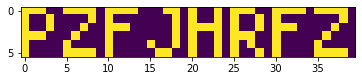

In [90]:
from timeit import default_timer as timer

DEBUG = False

run = [
    (day1, 1521, 1543),
    (day2, 1451208, 1620141160),
    (day3, 3885894, 4375225),
    (day4, 8580, 9576), 
    (day5, 6113, 20373),
    (day6, 363101, 1644286074024),
    (day7, 356922, 100347031),
    (day8, 310, 915941),
    (day9, 458, 1391940),
    (day11, 1732, 290), 
    (day13, 610, "PZFJHRFZ"),
    (day14, 2112, 3243771149914)
]
    
for vv in run:
    idx = int(vv[0].__name__[3:])
    
    start = timer()
    (p1, p2) = vv[0](read_lines(idx))
    end = timer()
    
    print(vv[0].__name__)
    print('part 1: ', p1)
    print('part 2: ', p2)
    print('elapsed: ', end - start)
    print()